# Predicting the sell price of the Bulldozers using Mchine Learning 


## 1. Problem Defination 

> How well we can predict the price of the bulldozers, given its characteristic and previous examples of how much similar bulldozers have been sold for?

## 2. Data 

> data downloded from keggle and there are three main characteristic: 

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3. Evaluation 

> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

Note: The goal for most regression evaluation metrics is to minimize the error. For example our goal for this project will be to build a machine learning model which minimize RMSLE 

## 4. Features 

> kaggle provided data dictionary details of the features 


In [1]:
# importing some important library 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn

In [2]:
# importing training and validation set 

df = pd.read_csv("Datas\Bulldozers bluebook\TrainAndValid.csv", low_memory= False )

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

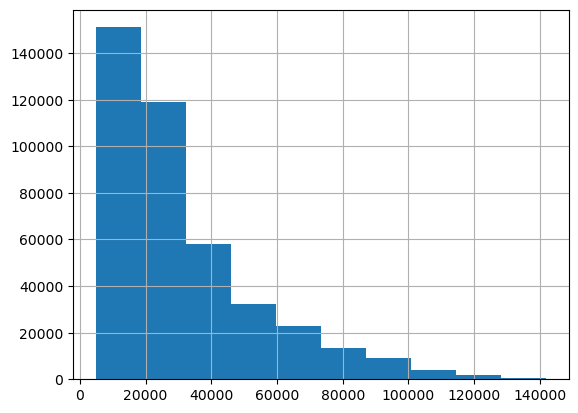

In [6]:
df.SalePrice.hist();

## Parsing dates 

We can covert our date type data into date and month and days by using pandas data frame by using `parsing_dates` parameters

In [7]:
df.saledate[:5] #this is in object type lets convert into datetime module by rereading the csv

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
Name: saledate, dtype: object

In [8]:
df = pd.read_csv("Datas\Bulldozers bluebook\TrainAndValid.csv", low_memory= False, parse_dates= ["saledate"])

In [9]:
df.saledate.dtype

dtype('<M8[ns]')

In [10]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

## Sorting Dataframe by saledate 

when working with time series data, its good idea to sorting data by dateandtime 

In [11]:
df.sort_values(by = "saledate", inplace = True, ascending= True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Make a copy of the orignal DataFrame 

we making a copy of our orignal dataframe so after manipulate our data we still got orignal data in our hands 

In [12]:
df_tmp = df.copy()

In [13]:
df_tmp.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN


## Add datetime parameters for `saledate` column

here are the documentation : https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [14]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.day_of_week
df_tmp["saleDayofYear"] =df_tmp.saledate.dt.day_of_year

In [15]:
df_tmp.head().T # all added in the dataframe

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [16]:
#droping saledate column from dataframe 
df_tmp.drop("saledate", axis = 1, inplace = True)

In [17]:
#checking the values of diffrent columns 

df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Converting string into categorical 

one way we can convert our string data into numerical value by converting into pandas catergories

https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_string_dtype.html

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 1

In [19]:
pd.api.types.is_string_dtype(df_tmp["Steering_Controls"]) #for example 52th value of above

True

In [20]:
# using for loop to find a columns which are strings 

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [21]:
#now convert those string columns into categorical values 

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()
        
# If the column is identified as a string type, this line converts the column to a categorical data type. 
# Here's what happens in detail:

# content.astype("category"): Converts the column to a categorical data type.
# .cat.as_ordered(): Converts the categorical column into an ordered categorical column.

In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [23]:
#lets see what we have done 

df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [24]:
df.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

**It might feels like nothing change but the change happend behind this lables pandas automatically assigned the numerica value of this perticular lable lets see in following example**

In [25]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

**Thanks to Pandas Catergories now we can access all of our data in numberical form**

**But we still have missing values so we have to deal with it...**

In [26]:
df_tmp.isna().sum()/len(df_tmp) * 100 #missing value percentage 

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

## Filling Missing values 

### Fill numerical value first 

In [27]:
# again we are going to use pandas api function 

pd.api.types.is_numeric_dtype(df_tmp["SalePrice"]) #for example

True

In [28]:
# which columns have numrical values 

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayofYear


In [29]:
# check for which numercial columns have null values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [30]:
#filling missing values with median 
# why median because if there is outlier exist so the mean value might get diffrent and which are not show a middle value 
# so using median 

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #making new columns which contain binary value (True False)
            df_tmp[label + "_is_missing"] = pd.isnull(content)
            df_tmp[label] = content.fillna(content.median())

In [31]:
# check for which numercial columns have null values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [32]:
# checking that binary value 

df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

**This value stored in True and False, True for missing value and False for non-missing value**

## Filling and turning categrical variable into numbers 

In [33]:
#checking for non-numerical value

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [34]:
#Turn catergorical variables into numercal and fill the values
#les's see what I mean 

pd.Categorical(df_tmp.state)

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [35]:
pd.Categorical(df_tmp.state).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

**Notice : Here all the value are categories by it self and one thing to note if there are NaN value so the its category is `-1` so we are gonna add `+1` in it to clear our data**

In [36]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label + "_is_missing"] = pd.isnull(content) #binary variable
        df_tmp[label] = pd.Categorical(content).codes + 1 #its becoming 0

In [37]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Now using Machine Learning algoritham

we are currently using RandomForestregressor to predict price of the bulldozers 

In [38]:
#importing our model 
from sklearn.ensemble import RandomForestRegressor

**In the description of the compition or keggal data they told that we need to predict price of the bulldozers which are sold after 2012 so its befor 2012 is our training set and after 2012 is our validation set**

In [39]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [40]:
#spliting the data 

training_data = df_tmp[df_tmp.saleYear != 2012]
validation_data = df_tmp[df_tmp.saleYear == 2012]

In [41]:
training_data.shape, validation_data.shape

((401125, 103), (11573, 103))

In [42]:
# spliting data into x and y

X_train, Y_train = training_data.drop("SalePrice", axis = 1), training_data["SalePrice"]
X_valid, Y_valid = validation_data.drop("SalePrice", axis = 1), validation_data["SalePrice"]

In [43]:
X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Buliding an evaluation function 

In [44]:
# creating evaluation function (we need to creat function for RMSLE)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculate Root mean square log error between prediction and True label
    """
    #there is no such function availabe as RMSLE so we just sqrt of MSLE
    return np.sqrt(mean_squared_log_error(y_test, y_preds)) 


# create a function to evaluate model of few diffrent level

def show_score(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    
    scores = {"Training MAE" : mean_absolute_error(Y_train, train_preds),
              "Valid MAE" : mean_absolute_error(Y_valid, valid_preds),
              "Training RMSLE": rmsle(Y_train, train_preds),
              "Valid RMSLE" : rmsle(Y_valid, valid_preds),
              "Training R^2" : r2_score(Y_train, train_preds),
              "Valid R^2" : r2_score(Y_valid, valid_preds)}
    return scores

## Testing our model on subset (To tune hyper parameters)

**One thing to clarify that our data set is almost morethan 4lakh rows and if we gonna try to train the model on this whole stuff 1st it will gonnna take long a$$ time and 2nd my computer gonna be fucked if I do that so we need to find another way for it**

In [45]:
# model = RandomForestRegressor(n_jobs= -1, random_state= 69)

# model.fit(X_train, Y_train)

**Ofcourse we aint gonna do that**

In [46]:
%%time
#lest try only 100000 sample to train 


model = RandomForestRegressor(n_jobs= -1,
                              random_state= 69,
                              max_samples= 10000) #it same as X_train[:100000], y_train[:1000]
model.fit(X_train, Y_train)

CPU times: total: 1min 28s
Wall time: 13.5 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=69)

In [47]:
show_score(model)

{'Training MAE': 5554.7287133686505,
 'Valid MAE': 7167.441519052968,
 'Training RMSLE': 0.2574863273368487,
 'Valid RMSLE': 0.2935640874714954,
 'Training R^2': 0.86101533629751,
 'Valid R^2': 0.8329463360814856}

## Hyperparameter Tuning with RandomizedSearchCV

In [48]:
%%time 

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators" : np.arange(10, 1000, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features" : [0.5, 1 ,"sqrt", "auto"],
           "max_samples" : [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs= -1, random_state= 69),
                             param_distributions= rf_grid, 
                             n_iter= 2,
                             cv= 5,
                             verbose= True)

rs_model.fit(X_train, Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 3min 21s
Wall time: 4min


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=69),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  9...
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [49]:
show_score(rs_model)

{'Training MAE': 8281.09032948123,
 'Valid MAE': 9829.767386850714,
 'Training RMSLE': 0.364731412935984,
 'Valid RMSLE': 0.3937667338209999,
 'Training R^2': 0.7199428681983564,
 'Valid R^2': 0.7150125025394232}

In [50]:
rs_model.best_params_ #fuck this shit we are going to do something else

{'n_estimators': 770,
 'min_samples_split': 6,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

## Training a model with best hyperparameter 

**Note:** I didnt found that parametrs it was found by Denial and its on 100 n_iters which is not suitable for my pc it will going to burn and I dont have much money to buy new one

In [51]:
%%time 

ideal_model = RandomForestRegressor(n_estimators= 40,
                                    min_samples_leaf=1,
                                    min_samples_split= 14,
                                    max_features= 0.5, 
                                    n_jobs= -1,
                                    max_samples= None,
                                    random_state= 69)

ideal_model.fit(X_train, Y_train)

CPU times: total: 8min 26s
Wall time: 1min 26s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=69)

In [52]:
show_score(ideal_model) #too much improvement

{'Training MAE': 2948.430573252706,
 'Valid MAE': 5940.492994228834,
 'Training RMSLE': 0.14432392169454122,
 'Valid RMSLE': 0.24591864562715962,
 'Training R^2': 0.9590579495764435,
 'Valid R^2': 0.8823697569318704}

**Now as per the keggle compititon Rule we have to predict the price of the `test.csv` dataset**

In [76]:
df_test = pd.read_csv("Datas\Bulldozers bluebook\Test.csv",
                      low_memory= False,
                      parse_dates= ["saledate"])

In [77]:
df_test.head() 

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


**No SaleDate column cause we have to predict it**

In [78]:
#make prediction with our idealmodel

test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


**Ofcourse it will going to raise an error because we modify our training data a lot we actually added some new binary columns**

**So we have to modify it**

In [79]:
len(X_train.columns), len(df_test.columns)

(102, 52)

In [80]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [81]:
#making a fucntion to modify our test dataset in single shot

def preprocessing_data(df):
    """
    Perform Transformation on df and return df
    """
    #making diffret column form data time data 
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.day_of_week
    df["saleDayofYear"] =df.saledate.dt.day_of_year
    
    #removing columns from the dataset as we did before 
    df.drop("saledate", axis = 1, inplace = True)
    
    #fill the numeric value with median 
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #making new columns which contain binary value (True False)
                df[label + "_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
    
    #Filled Categorical missing data and turn Categorical data into number 
        if not pd.api.types.is_numeric_dtype(content):
            df[label +"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
    
    
    return df

In [82]:
df_test = preprocessing_data(df_test)

In [86]:
len(df_test.columns), len(X_train.columns)

(101, 102)

In [87]:
set(X_train) - set(df_test)

{'auctioneerID_is_missing'}

**This columns didnt add because there no missing value in the `auctioneerID` so we have to manually put it into the dataframe**

In [90]:
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


**Now all set let's make prediction now**

In [93]:
set_data = X_train["auctioneerID_is_missing"]

In [98]:
set_data.value_counts()

False    380989
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [99]:
X_train.drop("auctioneerID_is_missing", axis = 1, inplace = True)

In [102]:
X_train = pd.concat([X_train, set_data], axis = 1)

In [103]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,False,False,False,True,True,False
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,False,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,False,False,False,True,True,False
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,False,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393098,6260687,1074871,4331,149,2.0,1000,0.0,0,3137,1055,...,True,True,True,True,True,True,True,False,False,False
400217,6312170,1812622,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,False
400302,6312727,1811599,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,False
400393,6315051,1858173,17432,149,2.0,2004,0.0,0,3389,1175,...,True,True,True,True,True,True,True,True,True,False


In [104]:
%%time 

ideal_model = RandomForestRegressor(n_estimators= 40,
                                    min_samples_leaf=1,
                                    min_samples_split= 14,
                                    max_features= 0.5, 
                                    n_jobs= -1,
                                    max_samples= None,
                                    random_state= 69)

ideal_model.fit(X_train, Y_train)

CPU times: total: 8min 46s
Wall time: 1min 24s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=69)

In [106]:
test_preds = ideal_model.predict(df_test)

In [109]:
test_preds

array([17332.00901685, 17757.52389519, 50001.10916666, ...,
       15640.83573346, 18699.1341028 , 31030.46250624])

**acually few mess happened I solved out by training a model again so all sort**

In [110]:
# we made the prediction but it is not in a same form as kaggle so.....
# lets do it
df_preds = pd.DataFrame()
df_preds["SaleID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds.head()

,SaleID,SalePrice
0,1227829,17332.009017
1,1227844,17757.523895
2,1227847,50001.109167
3,1227848,70588.442130
4,1227863,60671.060007


## Feature Importance 

Feature importance seeks to figure out which diffrent attribute of the data were most importance when it comes to predict the target variable (saleprice)

In [111]:
ideal_model.feature_importances_

array([3.37745724e-02, 2.06012991e-02, 4.67659377e-02, 1.69894721e-03,
       3.36862756e-03, 2.01865744e-01, 3.43692726e-03, 1.13033625e-03,
       4.61409470e-02, 3.41739426e-02, 6.29762773e-02, 4.98805843e-03,
       1.46515026e-02, 1.50743866e-01, 4.77770551e-02, 5.91390894e-03,
       4.71920990e-03, 3.04884888e-03, 2.80430275e-03, 6.71441401e-02,
       7.31049672e-04, 6.09171325e-05, 1.21435517e-03, 1.61327717e-04,
       1.19267973e-03, 1.81726855e-04, 1.01803393e-03, 4.45924125e-03,
       2.25035857e-03, 2.60663730e-03, 1.65365464e-03, 1.93628713e-03,
       3.92044171e-03, 7.63867617e-03, 2.51646788e-03, 6.69376773e-03,
       9.69083780e-04, 5.19521229e-03, 2.31121016e-03, 1.51864442e-03,
       1.03596113e-03, 9.44758554e-04, 4.43225061e-03, 6.16882388e-04,
       3.14093773e-04, 3.48120545e-04, 2.43966238e-04, 2.09743759e-03,
       1.14818212e-03, 3.12817342e-04, 3.19984636e-04, 7.25552419e-02,
       3.81017367e-03, 5.64105328e-03, 2.91024479e-03, 9.85763099e-03,
      

In [114]:
#let's plot it 

def plot_features(columns, importance, n= 20):
    
    df = (pd.DataFrame({"Features" : columns,
                        "Feature_importance" : importance})
        .sort_values("Feature_importance", ascending= False).reset_index(drop= True))
    
    fig, ax = plt.subplots()
    ax.barh(df["Features"][:n], df["Feature_importance"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature_importance")
    ax.invert_yaxis()

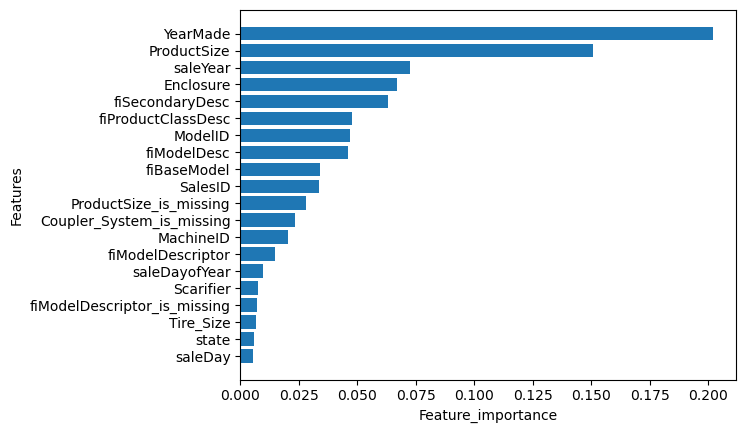

In [115]:
plot_features(X_train.columns, ideal_model.feature_importances_)